In [7]:
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt

In [18]:
n_data = torch.ones(100,2)

In [28]:
x0 = torch.normal(2*n_data, 1)

In [32]:
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0,y1), 0).type(torch.LongTensor)

In [45]:
x1.shape

torch.Size([100, 2])

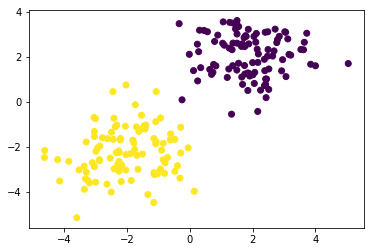

In [34]:
plt.scatter(x.numpy()[:,0],x.numpy()[:,1],c=y.numpy())

In [37]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden_1, n_hidden_2, n_output):
        super(Net, self).__init__()
        self.hidden_1 = torch.nn.Linear(n_feature, n_hidden_1)
        self.hidden_2 = torch.nn.Linear(n_hidden_1, n_hidden_2)
        self.predict = torch.nn.Linear(n_hidden_2, n_output)
    def forward(self, x):
        x = F.relu(self.hidden_1(x))
        x = F.relu(self.hidden_2(x))
        x = self.predict(x)
        return x
        

In [38]:
net = Net(2, 10, 10, 2)

In [50]:
optimizer = torch.optim.SGD(net.parameters(), lr = 0.001)
loss_func = torch.nn.CrossEntropyLoss()
j = 0
for i in net.parameters():
    if j < 2:
        i.requires_grad = False
    j += 1

/home/lyhe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


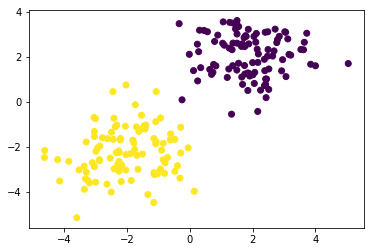

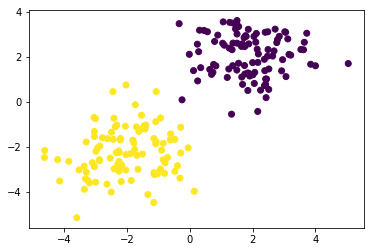

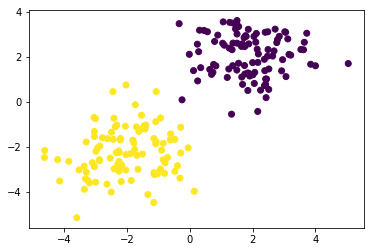

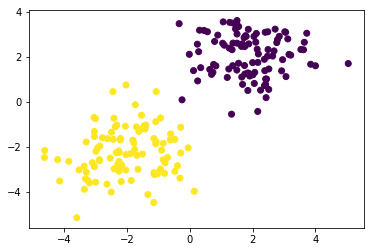

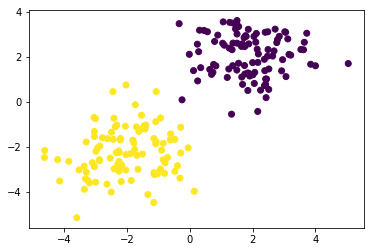

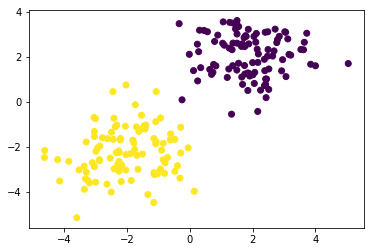

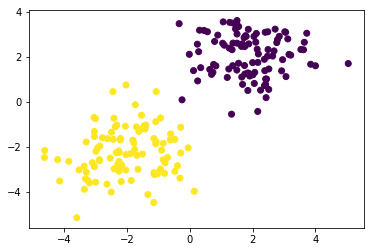

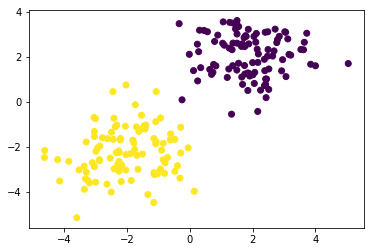

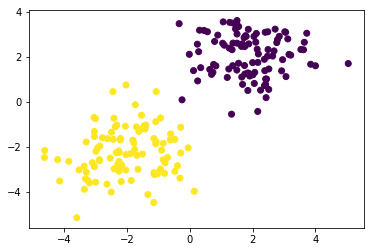

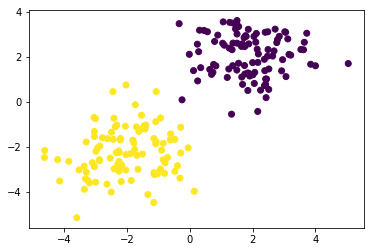

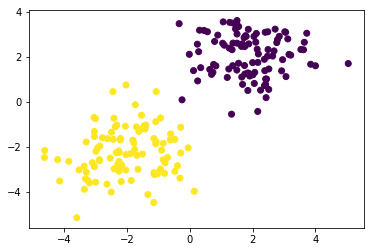

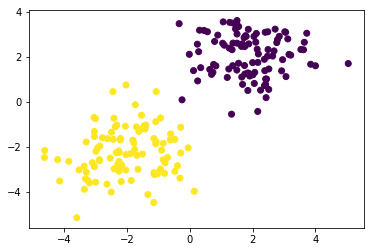

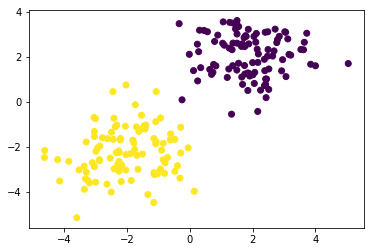

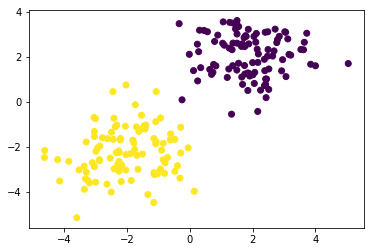

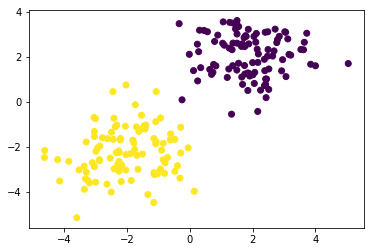

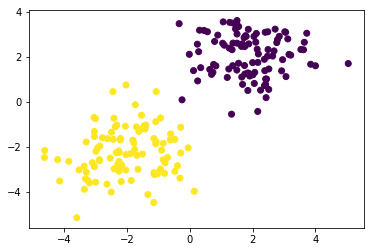

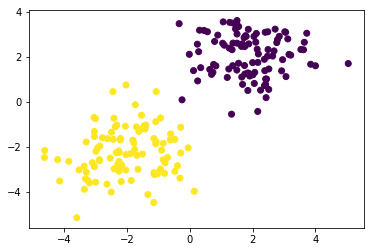

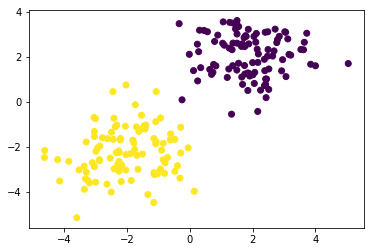

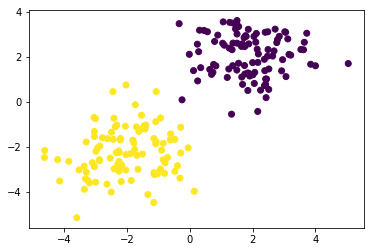

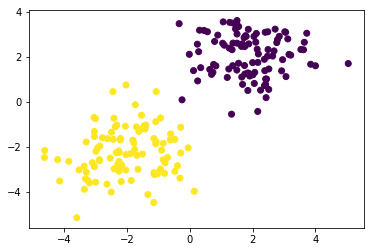

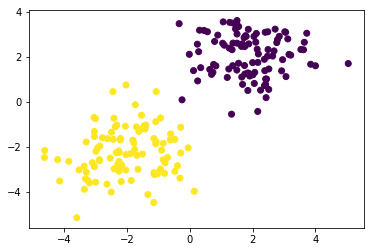

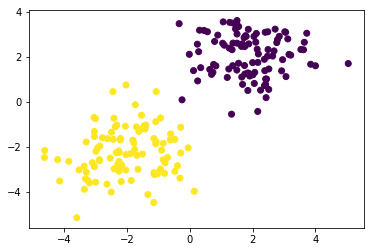

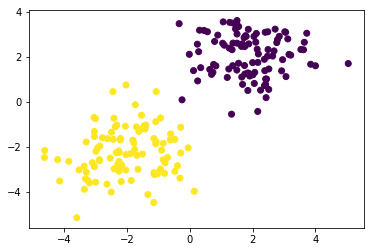

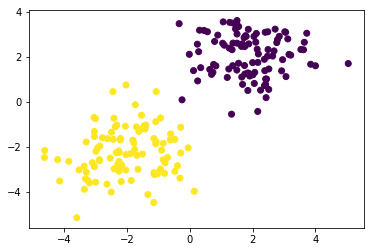

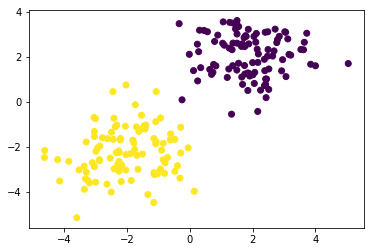

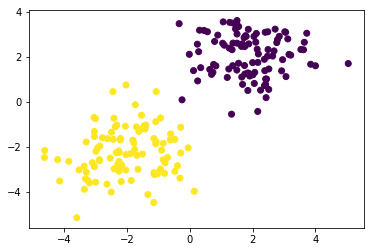

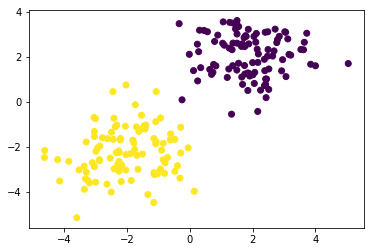

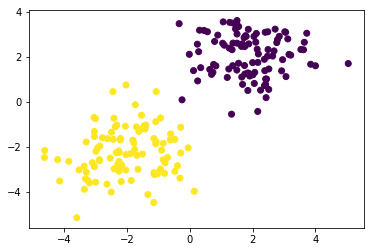

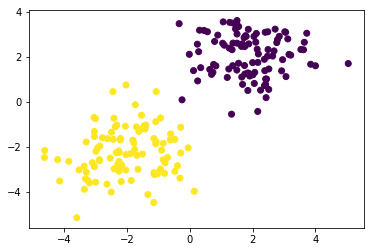

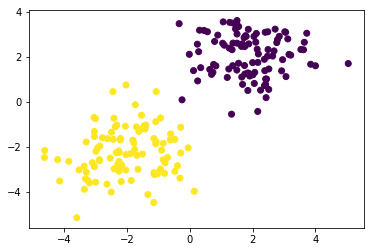

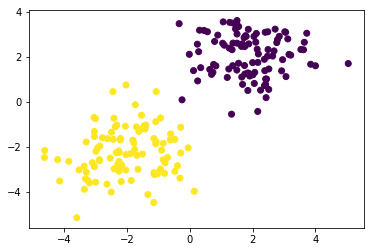

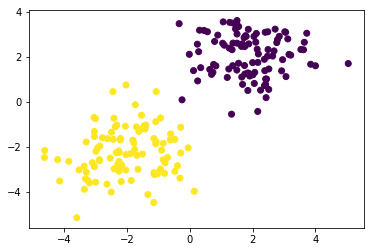

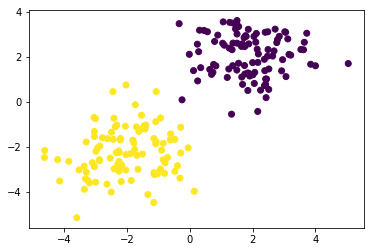

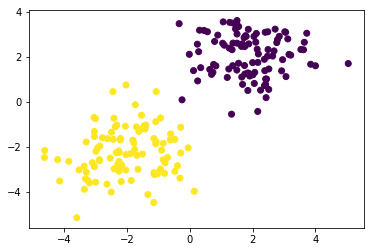

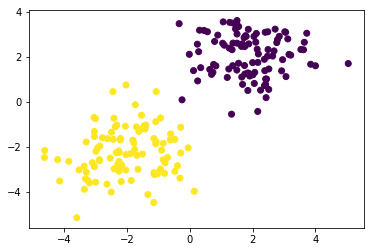

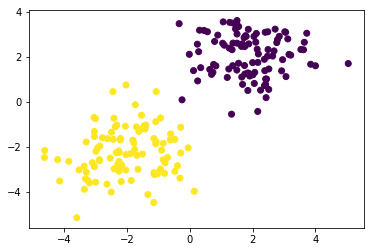

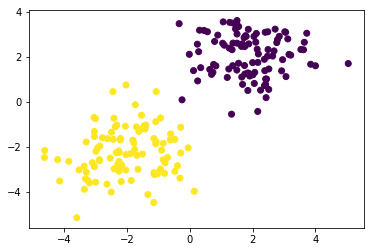

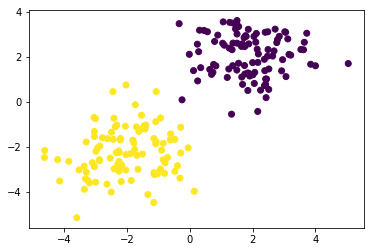

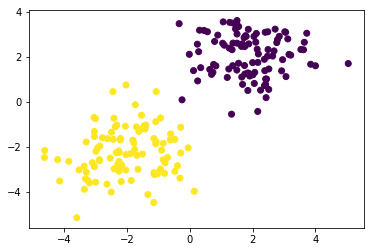

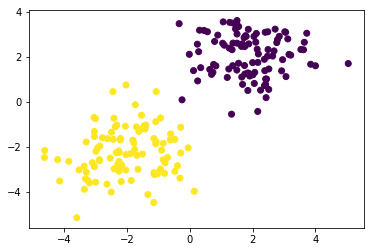

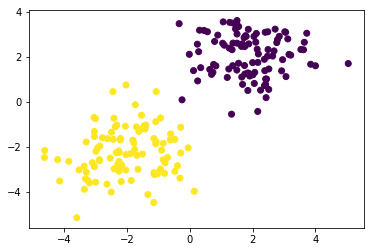

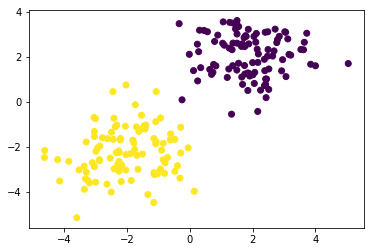

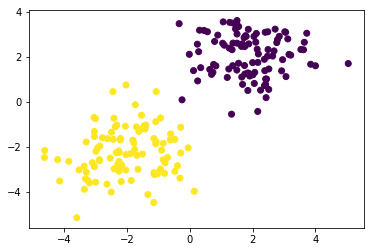

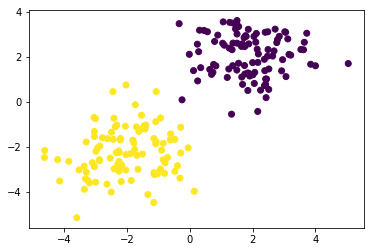

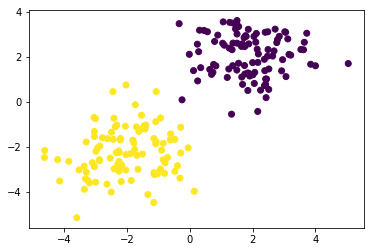

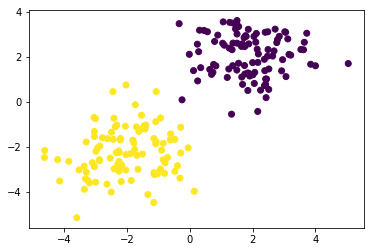

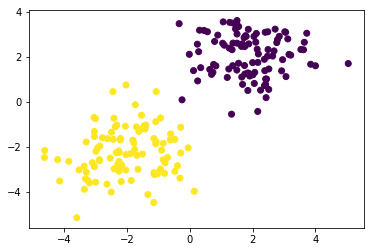

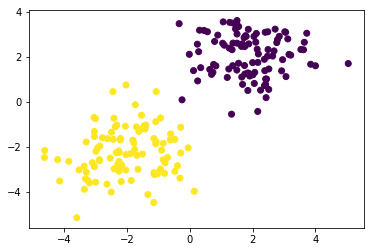

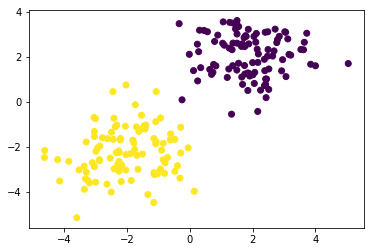

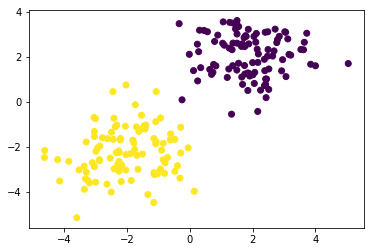

In [51]:
n = 0
for i in range(100):
    out = net(x)
    loss = loss_func(out, y) # real one be the last
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    n += 1
    if n % 2 == 0:
        plt.cla()
        prediction = torch.max(F.softmax(out), 1)[1]
        pred_y = prediction.detach().numpy().squeeze()
        target_y = y.detach().numpy()
        plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=pred_y)
        plt.pause(0.1)
        
        

In [16]:
for i in net.named_parameters():
    print(i)

('hidden_1.weight', Parameter containing:
tensor([[ 0.8987],
        [-0.3390],
        [ 0.0313],
        [ 0.5149],
        [-0.8670],
        [ 0.7578],
        [ 0.4793],
        [-0.4694],
        [ 0.4200],
        [ 0.2728]]))
('hidden_1.bias', Parameter containing:
tensor([ 0.4058,  0.2708,  0.1524, -0.5344,  0.4059,  0.3251, -0.6894,  0.5822,
         0.2441,  0.2460]))
('hidden_2.weight', Parameter containing:
tensor([[ 0.2233,  0.0269,  0.3086, -0.2292, -0.2269, -0.1785, -0.2264, -0.2123,
         -0.0009,  0.3234],
        [-0.1318,  0.3801, -0.1833, -0.2748,  0.5795, -0.1204, -0.2879,  0.4203,
         -0.4029, -0.1105],
        [-0.1134,  0.1140,  0.1474,  0.1000,  0.1148,  0.1936,  0.0731,  0.1720,
          0.1075, -0.2656],
        [-0.1327, -0.0625, -0.2362,  0.0211,  0.1061,  0.1339,  0.2837, -0.2084,
          0.1623, -0.2330],
        [-0.2840,  0.0426,  0.2740,  0.3116, -0.0143,  0.0569, -0.2694,  0.2391,
          0.0179,  0.0040],
        [-0.1945, -0.3039, -0.0

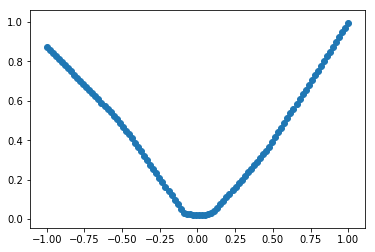

In [17]:
plt.scatter(x.numpy(),prediction.detach().numpy()) 

In [52]:
#method

net2

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)

In [56]:
x = torch.unsqueeze(torch.linspace(-2,2,100), dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.shape)
def save():
    net2 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1),
    )
    optimizer = torch.optim.SGD(net2.parameters, lr = 0.01)
    loss_func = torch.nn.MSELoss()
    for i in range(100):
        predict = net2(2)
        loss = loss_func(predict, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    torch.save(net2, 'net2.pkl') #entire net
    torch.save(net2.state_dict(),'net2_para.pkl') #parameters
    

In [58]:
def restore_net():
    net2 = torch.load('net.pkl')
    pass
def restore_net_1():
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1),
    )
    net3.load_state_dict(torch.laod('net2_para.pkl'))

In [59]:
import torch.utils.data as Data

In [67]:
BATCH_SIZE = 8
x = torch.linspace(1,10,10)
y = torch.linspace(10,1,10)

torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
        dataset = torch_dataset,
        batch_size = BATCH_SIZE,
        shuffle = True,
        num_workers = 2
    )#传入的是整个数据，传出的是美个batch的数据

for epoch in range(10):
    for step, (batch_x, batch_y) in enumerate(loader):
        #training...
        print ('Epoch', epoch, '| Step', step, '| batch x:',
               batch_x.numpy(), '\t| batch y:', batch_y.numpy())
        


Epoch 0 | Step 0 | batch x: [  7.   6.   2.   4.   3.   1.  10.   9.] 	| batch y: [  4.   5.   9.   7.   8.  10.   1.   2.]
Epoch 0 | Step 1 | batch x: [ 5.  8.] 	| batch y: [ 6.  3.]
Epoch 1 | Step 0 | batch x: [  3.  10.   4.   1.   5.   8.   6.   2.] 	| batch y: [  8.   1.   7.  10.   6.   3.   5.   9.]
Epoch 1 | Step 1 | batch x: [ 9.  7.] 	| batch y: [ 2.  4.]
Epoch 2 | Step 0 | batch x: [ 10.   1.   7.   2.   8.   5.   3.   4.] 	| batch y: [  1.  10.   4.   9.   3.   6.   8.   7.]
Epoch 2 | Step 1 | batch x: [ 6.  9.] 	| batch y: [ 5.  2.]
Epoch 3 | Step 0 | batch x: [  7.   9.   8.   1.  10.   3.   6.   4.] 	| batch y: [  4.   2.   3.  10.   1.   8.   5.   7.]
Epoch 3 | Step 1 | batch x: [ 5.  2.] 	| batch y: [ 6.  9.]
Epoch 4 | Step 0 | batch x: [  1.   7.   4.   8.   3.  10.   6.   9.] 	| batch y: [ 10.   4.   7.   3.   8.   1.   5.   2.]
Epoch 4 | Step 1 | batch x: [ 2.  5.] 	| batch y: [ 9.  6.]
Epoch 5 | Step 0 | batch x: [ 3.  5.  8.  2.  6.  7.  1.  4.] 	| batch y: [  8. 

In [68]:
#hyper para
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

0
1


/home/lyhe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


2
3
4
5
6
7
8
9
10
11


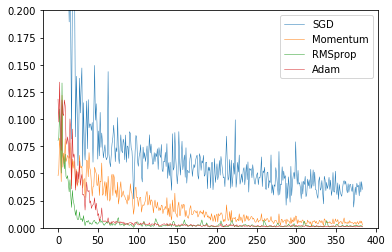

In [110]:
x = torch.unsqueeze(torch.linspace(-1,1,1000), dim = 1)
y = x.pow(2) + 0.1*torch.rand(x.shape)
# optimizer = torch.optim.SGD()
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
        dataset = torch_dataset,
        batch_size = BATCH_SIZE,
        shuffle = True,
        num_workers = 2
    )
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = torch.nn.Linear(1, 20)
        self.predict = torch.nn.Linear(20,1)
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

net_SGD = Net()
net_Momentum = Net()
net_RMSprop = Net()
net_Adam = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]  

opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr = LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr = LR, momentum=0.8)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr = LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr = LR, betas = (0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

loss_func = torch.nn.MSELoss()
losses_his = [[],[],[],[]]
for epoch in range(EPOCH):
    print(epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(batch_x)
            loss = loss_func(output,batch_y)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
#             loss.detach()[0])
            l_his.append(loss.detach()[0])
            
labels = ['SGD','Momentum','RMSprop','Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his,label=labels[i],linewidth=0.5)
plt.legend(loc='best')
plt.ylim((0,0.2))
plt.show()